# Trabalho de Processamento de Linguagem Natural




##### Professor: Alex 

##### Alunos: Cauã, Lucas Leal, Isaac e Pedro Lopes


# __________________________________________________________________________________________________________________________________
#  

#  
#  

## Instalando bibliotecas que serão utilizadas

In [152]:
!pip install -r requirements.txt

## Preparação do Corpus e Pré-Processamento
* Atividade:

    * Carregar o corpus de poesias de Fernando Pessoa em um Jupyter Notebook.
    * Realizar tokenização de sentenças e palavras.
    * Remover stopwords e pontuação para facilitar a análise.
    * Criar uma nuvem de palavras (WordCloud) para visualizar termos mais frequentes.

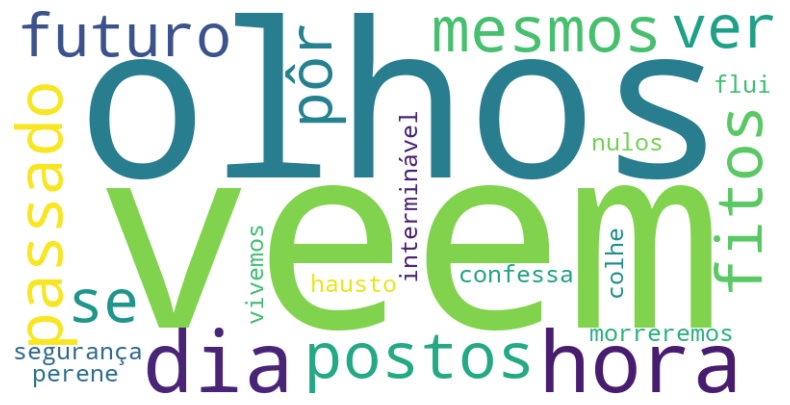

In [153]:
import spacy # Importar a biblioteca spaCy para processamento de linguagem natural
import matplotlib.pyplot as plt # Importar a biblioteca Matplotlib para visualização de dados
from wordcloud import WordCloud # Importar a biblioteca WordCloud para criação de nuvens de palavras

# Carregar o modelo de português do spaCy
nlp = spacy.load("pt_core_news_sm")

# Texto de exemplo (substituir pelo corpus real)
corpus = """Uns, com os olhos postos no passado,
Veem o que não veem; outros, fitos
Os mesmos olhos no futuro, veem
O que não pode ver-se.Porque tão longe ir pôr o que está perto —
A segurança nossa? Este é o dia,
Esta é a hora, este o momento, isto
É quem somos, e é tudo.Perene flui a interminável hora
Que nos confessa nulos. No mesmo hausto
Em que vivemos, morreremos. Colhe
O dia, porque és ele."""

# Processar o texto
doc = nlp(corpus)

# is_stop é para remover stopwords, is_punct é para remover pontuação e token.text.strip() é para remover espaços em branco
tokens_filtrados = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and token.text.strip()] 

# Criar a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(tokens_filtrados))

# Mostrar a nuvem de palavras
plt.figure(figsize=(10,5)) # Definir tamanho da figura
plt.imshow(wordcloud, interpolation="bilinear") # Exibir a nuvem de palavras
plt.axis("off") # Ocultar eixos
plt.show() # Exibir a nuvem de palavras

## Análise Estatística de Vocabulário
* Atividade:
    * Contar frequência de palavras e identificar os termos mais recorrentes.
    * Comparar o uso de substantivos, verbos e adjetivos na obra.
    * Criar um gráfico de distribuição de palavras.

C:\Users\cauac\AppData\Local\Temp\ipykernel_27724\3772909955.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Frequência", y="Palavras", data=df_frequencia, palette="Blues_r") # Barplot


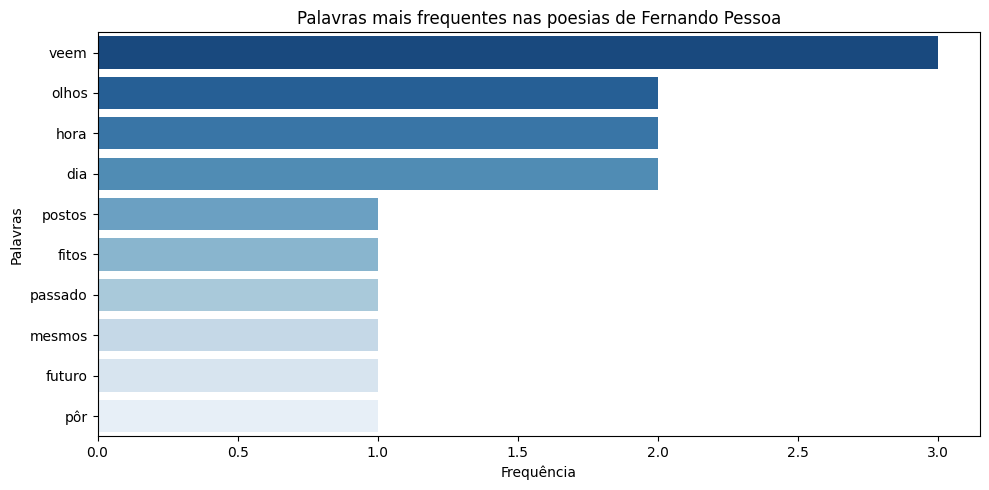

In [154]:
from collections import Counter # Importar a função Counter para contar a frequência das palavras
import pandas as pd # Criar DataFrame para visualização
import seaborn as sns # Importar a biblioteca Seaborn para visualização

# Contar a frequência das palavras
frequencia = Counter(tokens_filtrados)

# Criar DataFrame com as palavras mais frequentes
df_frequencia = pd.DataFrame(frequencia.items(), columns=["Palavras", "Frequência"]).sort_values(by="Frequência", ascending=False).head(10)

# Plotar gráfico de barras
plt.figure(figsize=(10, 5)) # Tamanho do gráfico
ax = sns.barplot(x="Frequência", y="Palavras", data=df_frequencia, palette="Blues_r") # Barplot
plt.xlabel("Frequência") # Legenda do eixo X
plt.ylabel("Palavras") # Legenda do eixo Y
plt.title("Palavras mais frequentes nas poesias de Fernando Pessoa") # Título do gráfico
plt.tight_layout() # Ajustar o layout
plt.show() # Mostrar o gráfico

# Análise Sintática e Estilística
* Atividade:
    * Aplicar POS-Tagging (Etiquetagem Gramatical).
    * Comparar a estrutura gramatical das poesias.
    * Criar um histograma da frequência de diferentes classes gramaticais.

C:\Users\cauac\AppData\Local\Temp\ipykernel_27724\1853726204.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Frequência", y="POS", data=df_pos, palette="Purples_r")  # Gráfico de barras


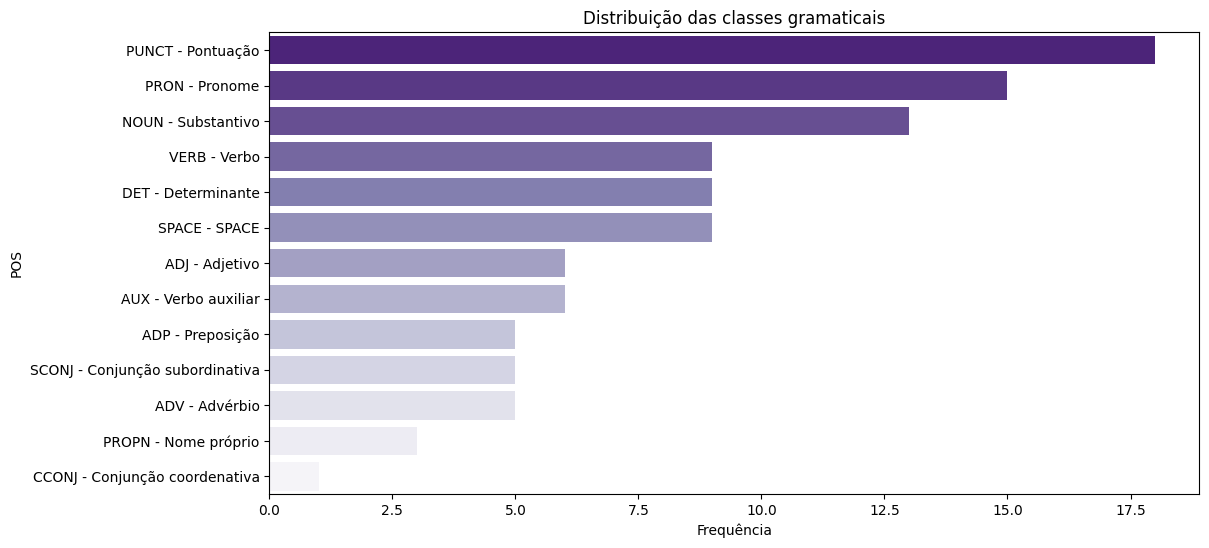

In [155]:
#Extrair classes gramaticais
pos_tags = [token.pos_ for token in doc]

# Contar a frequência de cada classe gramatical
contagem_pos = Counter(pos_tags)

# Mapeamento das classes gramaticais
pos_mapping = {
    "ADJ": "Adjetivo",
    "ADP": "Preposição",
    "ADV": "Advérbio",
    "AUX": "Verbo auxiliar",
    "CCONJ": "Conjunção coordenativa",
    "DET": "Determinante",
    "NOUN": "Substantivo",
    "NUM": "Numeral",
    "PART": "Partícula",
    "PRON": "Pronome",
    "PROPN": "Nome próprio",
    "PUNCT": "Pontuação",
    "SCONJ": "Conjunção subordinativa",
    "SYM": "Símbolo",
    "VERB": "Verbo",
    "X": "Outro"
}

# Substituir os POS pelo mapeamento com a abreviação e a descrição completa
mapped_pos = [f"{pos} - {pos_mapping.get(pos, pos)}" for pos in pos_tags]

# Contar novamente com os mapeamentos
contagem_pos_mapped = Counter(mapped_pos)

# Criar DataFrame para visualização
df_pos = pd.DataFrame(contagem_pos_mapped.items(), columns=["POS", "Frequência"]).sort_values(by="Frequência", ascending=False)

# Plotar gráfico de barras com tamanho maior
plt.figure(figsize=(12, 6))  # Aumentar o tamanho da figura
sns.barplot(x="Frequência", y="POS", data=df_pos, palette="Purples_r")  # Gráfico de barras
plt.xlabel("Frequência")  # Legenda do eixo x
plt.ylabel("POS")  # Legenda do eixo y
plt.title("Distribuição das classes gramaticais")  # Título do gráfico
plt.show()  # Exibir gráfico

# Modelagem de Estilo e Semântica
* Atividade:
    * Calcular a riqueza lexical das poesias.
    * Aplicar TF-IDF para destacar palavras mais importantes.
    * Criar embeddings de palavras para comparação semântica.

In [156]:
from sklearn.feature_extraction.text import TfidfVectorizer # Importar o vetorizador TF-IDF para criar um vetor de palavras

# Criar um vetor TF-IDF
vectorizer = TfidfVectorizer() # Inicializar o vetorizador
X = vectorizer.fit_transform([corpus]) # Vetorizar o corpus

# Converter o resultado em um DataFrame para visualização
df_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Somar as pontuações TF-IDF de todas as poesias para cada palavra
word_scores = df_tfidf.sum(axis=0).sort_values(ascending=False)

# Mostrar as 15 palavras mais importantes
top_n = 10
print(word_scores.head(top_n))  # Exibir as top N palavras com maior importância

print("\n")  # Pular uma linha
print("\n")  # Pular uma linha

print("Vetor TF-IDF:\n") # Exibir o vetor TF-IDF
print(df_tfidf)

que       0.476731
no        0.286039
veem      0.286039
hora      0.190693
olhos     0.190693
os        0.190693
este      0.190693
porque    0.190693
dia       0.190693
não       0.190693
dtype: float64




Vetor TF-IDF:

      colhe       com  confessa       dia       ele        em      esta  \
0  0.095346  0.095346  0.095346  0.190693  0.095346  0.095346  0.095346   

       este      está     fitos  ...        se  segurança     somos      tudo  \
0  0.190693  0.095346  0.095346  ...  0.095346   0.095346  0.095346  0.095346   

        tão       uns      veem       ver   vivemos        és  
0  0.095346  0.095346  0.286039  0.095346  0.095346  0.095346  

[1 rows x 49 columns]


# Comparação com Outros Poetas
* Atividade:
    * Comparar a escrita de Fernando Pessoa com a de outros poetas portugueses.
    * Gerar um modelo de similaridade textual para encontrar diferenças estilísticas.
    * Criar um classificador para tentar identificar quem escreveu um poema com base nas características do texto.


In [157]:
from sklearn.metrics.pairwise import cosine_similarity # Importando a função de similaridade com cosseno para comparar textos

# Exemplo comparando estilos de diferentes poetas

#Luís de Camões - O tempo acaba o ano, o mês e a hora
corpus_outro_poeta = """
O tempo acaba o ano, o mês e a hora,
A força, a arte, a manha, a fortaleza;
O tempo acaba a fama e a riqueza,
O tempo o mesmo tempo de si chora;

O tempo busca e acaba o onde mora
Qualquer ingratidão, qualquer dureza;
Mas não pode acabar minha tristeza,
Enquanto não quiserdes vós, Senhora.

O tempo o claro dia torna escuro
E o mais ledo prazer em choro triste;
O tempo, a tempestade em grão bonança.

Mas de abrandar o tempo estou seguro
O peito de diamante, onde consiste
A pena e o prazer desta esperança."""

X2 = vectorizer.transform([corpus_outro_poeta])

# Comparar semelhança entre Pessoa e outro poeta
sim = cosine_similarity(X, X2) # Calcular a similaridade com cosseno
print(f"Similaridade entre Fernando Pessoa e outro poeta: {sim[0][0]:.2f}") # Exibir a similaridade


Similaridade entre Fernando Pessoa e outro poeta: 0.33


# Apresentação dos Resultados

### Palavras mais destacadas
As palavras que se destacaram tanto na nuvem de palavras quanto nos gráficos de frequência incluem: "veem", "olham", "hora", "dia", "postos", "fitos", "passado", "mesmo", "futuro", entre outras. Essas palavras revelam os temas centrais do poema, que abordam o passado, o futuro e o presente. Ricardo Reis, ao escrever sobre esses momentos, reforça a importância de aproveitar a brevidade da vida, refletindo sobre a transitoriedade do tempo.

### Classes gramaticais mais frequentes
As classes gramaticais mais frequentes no texto são: **PUNCT** (pontuação), **PRON** (pronomes), **NOUN** (substantivos), **VERB** (verbos) e **DET** (determinantes). Isso sugere uma estrutura que privilegia as relações entre ações, objetos e sujeitos, com o uso de pronomes para marcar distâncias temporais e reflexões sobre o tempo e a existência.

### Modelagem de estilo e semântica
Ao analisar a modelagem de estilo e semântica, percebemos que o autor utiliza um vocabulário rico em termos que expressam conceitos temporais, como passado, presente e futuro, refletindo a centralidade do tempo nas suas poesias.

### Comparação com Luís de Camões
A semelhança entre os poemas está no fato de ambos falarem sobre o tempo e a vida passageira. Porém, o estilo de Fernando Pessoa e Luís de Camões é bem diferente. Pessoa, com seu heterônimo Ricardo Reis, usa uma linguagem mais reflexiva e filosófica, enquanto Camões tem um tom mais épico e grandioso, falando sobre o amor e o tempo.
